In [2]:
# Add project root to Python path so sees me module
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)


In [349]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.div_harvest import cal_div_harvest
from src.plot_utils import *
from src.utils import download_and_cache_data

# Download data

### Australian data

In [277]:
# read list of tickers to download
asx = pd.read_csv('../data/asx200.csv')
asx200_tickers = asx['ticker'].tolist()

# download data
data = download_and_cache_data(asx200_tickers, period="20y", cache_filename='../data/asx200_data.csv')

$ABC.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$ABP.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$ALU.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$APT.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$AST.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$AWC.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$BIN.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$BLD.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$CIM.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$CSR.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$CWN.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$GXY.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$LNK.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$MGF.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$MLT.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$NCM.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$ORE.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$OSH.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$OZL.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$PDL.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$SKI.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$SLK.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$SVW.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$SYD.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$TLT.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$VOC.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$VUK.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$WPL.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


$Z1P.AX: possibly delisted; no price data found  (period=20y) (Yahoo error = "No data found, symbol may be delisted")


/home/daniel/Documents/projects/trading-bot/src/utils.py:21: FutureWarning:

The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.



Data saved to ../data/asx200_data.csv.


In [ ]:
# download the ASX200 index data for comparison (passive buy and hold strategy)
ticker = "^AXJO"
PERIOD = "20y"

stock = yf.Ticker(ticker)
print(stock.info)
print(stock.info.get("currency"))

# Adjusted prices are computed to reflect the total return of a stock by “reinvesting” dividends (and accounting for splits). 
# This means that historical prices are modified so that they include the effect of dividend payments.
# Want to turn off Auto adjust
data = stock.history(period=PERIOD, actions=True, auto_adjust=False)
data['Dividends'] = data['Dividends'].fillna(0)
print(data.shape)

# Ensure the index is datetime and tz-naive
if not pd.api.types.is_datetime64_any_dtype(data.index):
    data.index = pd.to_datetime(data.index)
if data.index.tz is not None:
    data.index = data.index.tz_convert('UTC').tz_localize(None)

data.to_csv('../data/asx200_axjo_index.csv')

### NZ data

In [278]:
with open('../data/nzx50.txt', 'r') as file:
    # Read each line, remove extra whitespace/newlines, and filter out any empty lines
    nzx50_tickers = [line.strip() for line in file if line.strip()]

print(nzx50_tickers)

data_nz = download_and_cache_data(nzx50_tickers, period="20y", cache_filename='../data/nzx50_data.csv')

['FPH.NZ', 'MEL.NZ', 'AIA.NZ', 'IFT.NZ', 'MCY.NZ', 'EBO.NZ', 'CEN.NZ', 'MFT.NZ', 'SPK.NZ', 'ATM.NZ', 'POT.NZ', 'VCT.NZ', 'CNU.NZ', 'GMT.NZ', 'FBU.NZ', 'SUM.NZ', 'RYM.NZ', 'GNE.NZ', 'AIR.NZ', 'PCT.NZ', 'FRW.NZ', 'MNW.NZ', 'KPG.NZ', 'GTK.NZ', 'VHP.NZ', 'WBC.NZ', 'PFI.NZ', 'SKC.NZ', 'HGH.NZ', 'VSL.NZ', 'SKL.NZ', 'ANZ.NZ', 'ARG.NZ', 'VGL.NZ', 'CHI.NZ', 'SPG.NZ', 'SCL.NZ', 'OCA.NZ', 'FSF.NZ', 'TWR.NZ', 'HLG.NZ', 'NZX.NZ', 'TRA.NZ', 'SAN.NZ', 'SKO.NZ', 'IPL.NZ', 'THL.NZ', 'SKT.NZ', 'WHS.NZ', 'KMD.NZ']
Data saved to ../data/nzx50_data.csv.


# ASX200 Analysis

In [279]:
# Load data from csv
df_asx200 = pd.read_csv('../data/asx200_data.csv', index_col=0)

# Convert the index to datetime with UTC; this forces the datetime to be tz-aware initially.
df_asx200.index = pd.to_datetime(df_asx200.index, utc=True)

# Then convert to tz-naive by dropping the timezone.
df_asx200.index = df_asx200.index.tz_convert('UTC').tz_localize(None)

# Verify that the index is now tz-naive.
assert df_asx200.index.tz is None, f"Index timezone is not None: {df_asx200.index.tz}"

In [285]:
# Short list of ASX200 tickers
asx_tickers = [
    "BHP.AX", "CBA.AX", "WBC.AX", "ANZ.AX", "NAB.AX", "TLS.AX", "WES.AX"
]

In [311]:
# Full list of ASX200 tickers
asx = pd.read_csv('../data/asx200.csv')
asx_tickers = asx['ticker'].tolist()

In [366]:
bssr = 0.5
investment = 3000
trading_fee = 3

results_profit_ax, results_pct_ax, results_trades_ax = cal_div_harvest(asx_tickers, period="20y", bssr=bssr, data=df_asx200, investment=investment, trading_fee=trading_fee)

# Convert the dictionary of dictionaries into a DataFrame.
# The outer keys (tickers) will be the rows and the inner keys (years) become columns.


Processing A2M.AX...
  No dividend events for A2M.AX.
Processing AAA.AX...
Processing ABC.AX...
  No historical data for ABC.AX.
Processing ABP.AX...
  No historical data for ABP.AX.
Processing AFI.AX...
Processing AGL.AX...
Processing AIA.AX...
Processing ALD.AX...
Processing ALL.AX...
Processing ALQ.AX...
Processing ALU.AX...
  No historical data for ALU.AX.
Processing ALX.AX...
Processing AMC.AX...
Processing AMP.AX...
Processing ANN.AX...
Processing ANZ.AX...
Processing APA.AX...
Processing APE.AX...
Processing APT.AX...
  No historical data for APT.AX.
Processing APX.AX...
Processing ARB.AX...
Processing ARG.AX...
Processing AST.AX...
  No historical data for AST.AX.
Processing ASX.AX...
Processing AWC.AX...
  No historical data for AWC.AX.
Processing AZJ.AX...
Processing BAP.AX...
Processing BEN.AX...
Processing BGA.AX...
Processing BHP.AX...
Processing BIN.AX...
  No historical data for BIN.AX.
Processing BKW.AX...
Processing BLD.AX...
  No historical data for BLD.AX.
Processing

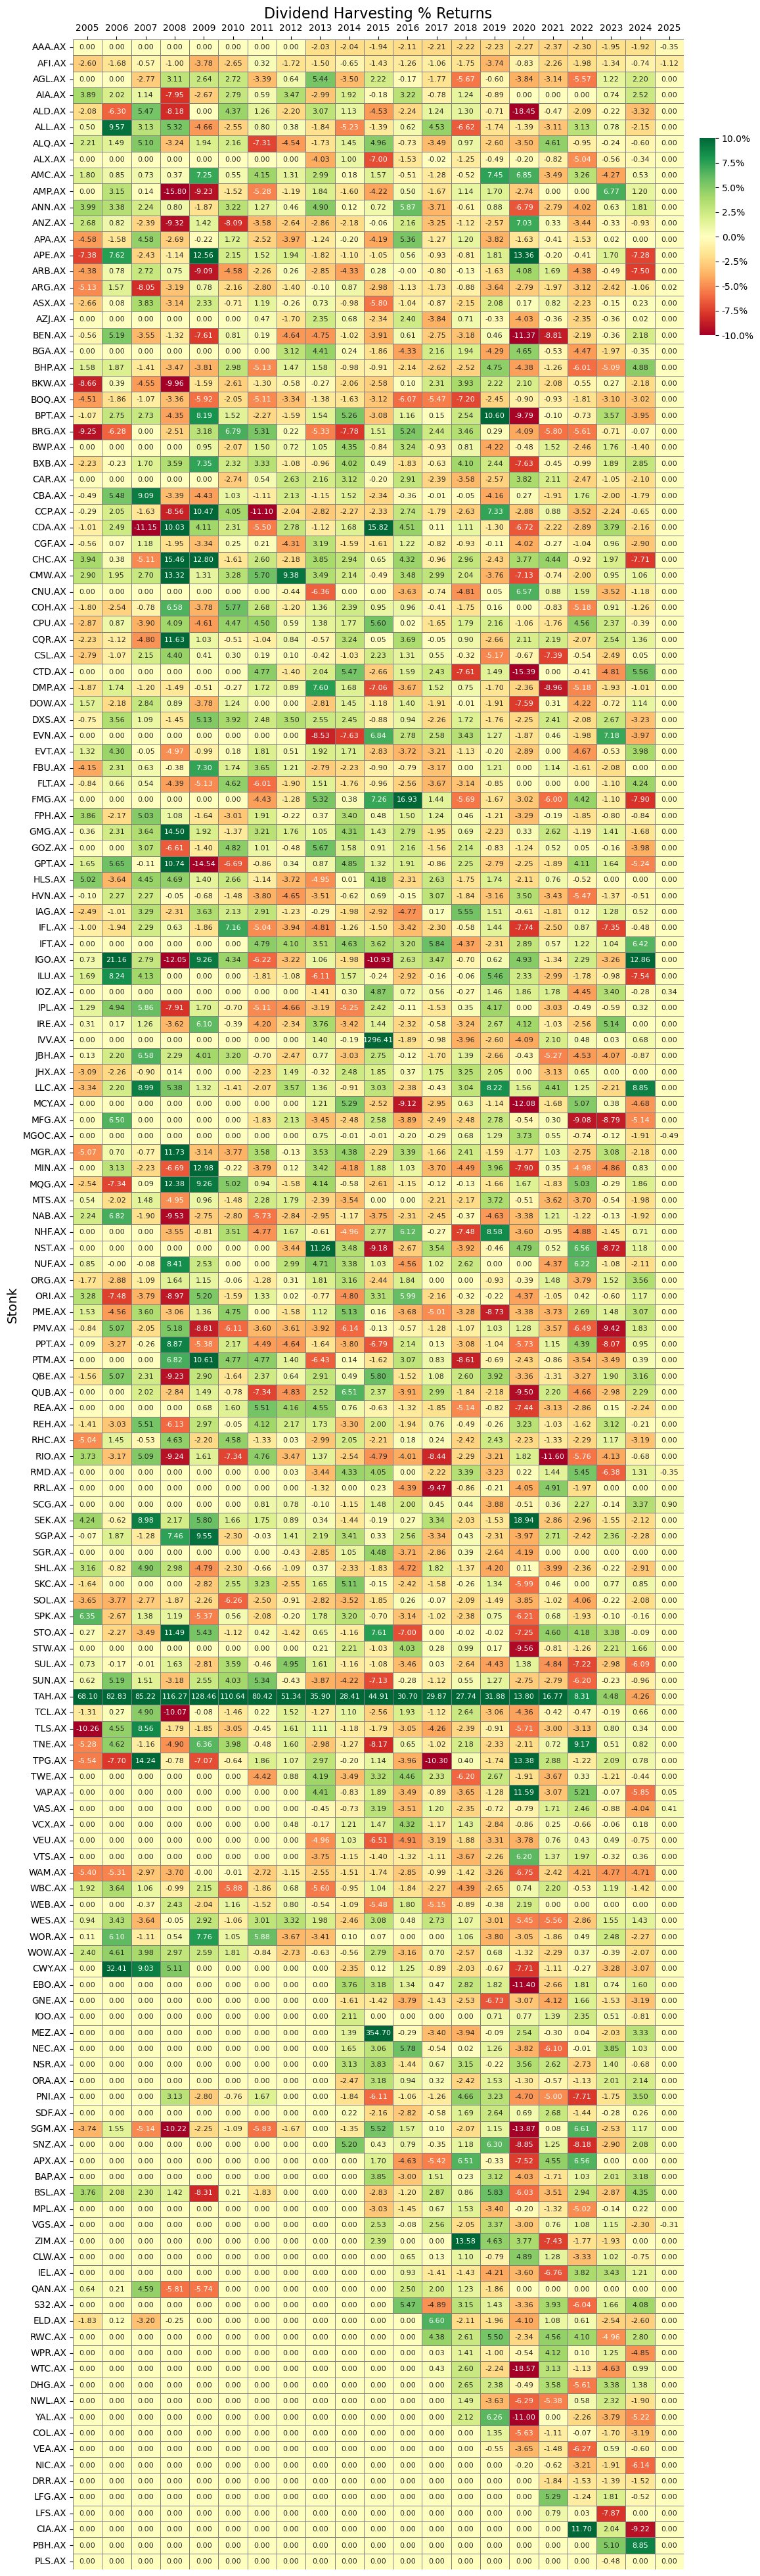

In [367]:
plot_heatmap(df=results_pct_ax, figsize=(12, 50), cbar_fixed_height_in=3)

In [303]:
results_trades_ax.head()


,ex_div_date,buy_date,sell_date,buy_price,sell_price,dividend,investment,shares,sell_proceeds,total_dividend,profit,pct_return,year,ticker
0,2005-02-27 13:00:00,2005-02-24 13:00:00,2005-02-28 13:00:00,15.434228,15.950089,0.1715,3000,194.178803,3094.169186,33.301665,127.470850,4.249028,2005,BHP.AX
1,2005-09-04 14:00:00,2005-09-01 14:00:00,2005-09-05 14:00:00,17.468551,16.844525,0.1920,3000,171.565464,2886.938802,32.940569,-80.120629,-2.670688,2005,BHP.AX
2,2006-02-26 13:00:00,2006-02-23 13:00:00,2006-02-27 13:00:00,20.501314,20.214263,0.2372,3000,146.185751,2952.037205,34.675260,-13.287535,-0.442918,2006,BHP.AX
3,2006-09-03 14:00:00,2006-08-31 14:00:00,2006-09-04 14:00:00,23.014057,23.351030,0.2424,3000,130.224757,3037.882252,31.566481,69.448733,2.314958,2006,BHP.AX
4,2007-02-25 13:00:00,2007-02-22 13:00:00,2007-02-26 13:00:00,24.174744,24.195545,0.2581,3000,123.972359,2996.578817,31.997266,28.576082,0.952536,2007,BHP.AX


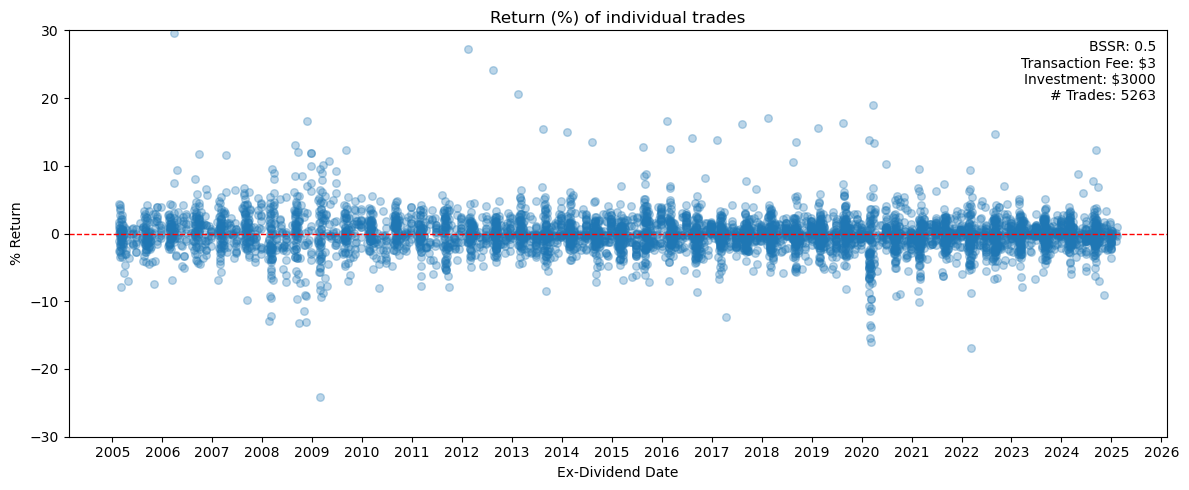

In [315]:
# Ensure the ex_div_date is in datetime format
results_trades_ax['ex_div_date'] = pd.to_datetime(results_trades_ax['ex_div_date'])

# Sort the DataFrame by ex_div_date to have a chronological order
df_trade_summary = results_trades_ax.sort_values(by='ex_div_date')

plot_trade_scatter(data=df_trade_summary, ylim=(-30, 30), 
                   bssr=bssr, trading_fee=trading_fee, investment=investment, 
                   marker_size=30, alpha=0.3)


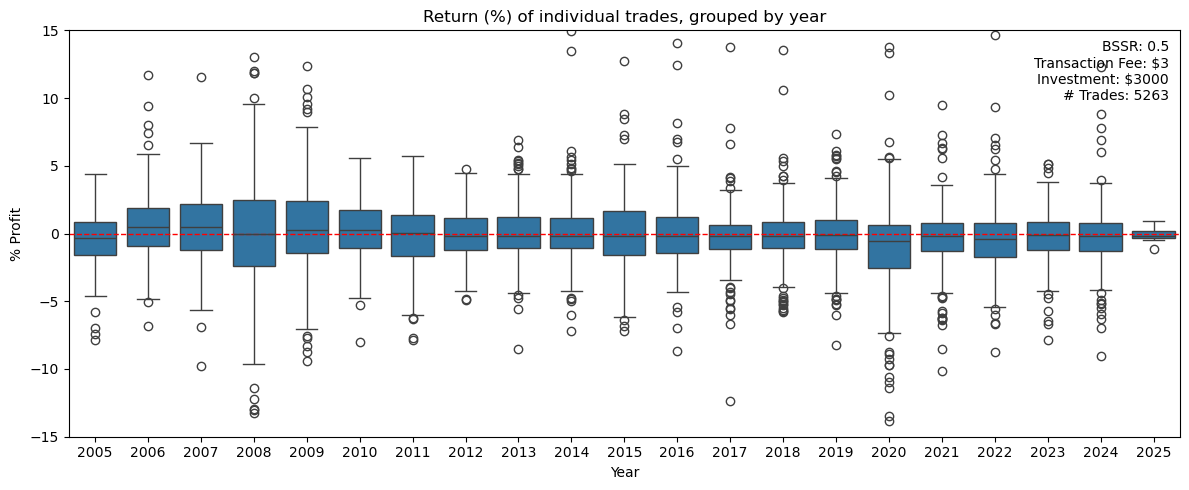

In [316]:
plot_yearly_boxplot(data=results_trades_ax, ylim=(-15, 15), bssr=bssr, trading_fee=trading_fee, investment=investment)

In [317]:
axjo = pd.read_csv('../data/asx200_axjo_index.csv')
axjo.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2005-02-13 13:00:00,4180.200195,4190.500000,4142.500000,4150.200195,0,0.0,0.0
1,2005-02-14 13:00:00,4150.299805,4159.299805,4140.700195,4144.799805,0,0.0,0.0
2,2005-02-15 13:00:00,4156.600098,4169.100098,4146.299805,4151.700195,0,0.0,0.0
3,2005-02-16 13:00:00,4157.500000,4172.100098,4150.299805,4166.899902,0,0.0,0.0
4,2005-02-17 13:00:00,4164.700195,4169.500000,4152.899902,4163.600098,0,0.0,0.0


In [358]:
plot_vintage_analysis(results_trades_ax, initial_investment=investment, min_year=2016, max_year=2024)

In [359]:
plot_vintage_hold_strategy(data=axjo, initial_investment=3000, min_year=2015, max_year=2024)

In [357]:
plot_vintage_ratio(trade_df=results_trades_ax,
                   hold_strategy_df=axjo,
                   initial_investment=investment,
                   min_year=2016,
                   max_year=2024)

In [344]:
plot_event_overlap_with_positions(results_trades_ax)

# NZX50

In [324]:
# Load data from csv
df_nzx50= pd.read_csv('../data/nzx50_data.csv', index_col=0)

# Convert the index to datetime with UTC; this forces the datetime to be tz-aware initially.
df_nzx50.index = pd.to_datetime(df_nzx50.index, utc=True)

# Then convert to tz-naive by dropping the timezone.
df_nzx50.index = df_nzx50.index.tz_convert('UTC').tz_localize(None)

# Verify that the index is now tz-naive.
assert df_nzx50.index.tz is None, f"Index timezone is not None: {df_nzx50.index.tz}"


In [325]:
with open('../data/nzx50.txt', 'r') as file:
    # Read each line, remove extra whitespace/newlines, and filter out any empty lines
    nzx50_tickers = [line.strip() for line in file if line.strip()]

In [326]:
bssr = 0.5
investment = 3000
trading_fee = 3

results_profit, results_pct, results_trades = cal_div_harvest(nzx50_tickers, period="20y", bssr=bssr, data=df_nzx50, investment=investment, trading_fee=trading_fee)

Processing FPH.NZ...
Processing MEL.NZ...
Processing AIA.NZ...
Processing IFT.NZ...
Processing MCY.NZ...
Processing EBO.NZ...
Processing CEN.NZ...
Processing MFT.NZ...
Processing SPK.NZ...
Processing ATM.NZ...
  No dividend events for ATM.NZ.
Processing POT.NZ...
Processing VCT.NZ...
Processing CNU.NZ...
Processing GMT.NZ...
Processing FBU.NZ...
Processing SUM.NZ...
Processing RYM.NZ...
Processing GNE.NZ...
Processing AIR.NZ...
Processing PCT.NZ...
Processing FRW.NZ...
Processing MNW.NZ...
Processing KPG.NZ...
Processing GTK.NZ...
Processing VHP.NZ...
Processing WBC.NZ...
Processing PFI.NZ...
Processing SKC.NZ...
Processing HGH.NZ...
Processing VSL.NZ...
Processing SKL.NZ...
Processing ANZ.NZ...
Processing ARG.NZ...
Processing VGL.NZ...
Processing CHI.NZ...
Processing SPG.NZ...
Processing SCL.NZ...
Processing OCA.NZ...
Processing FSF.NZ...
Processing TWR.NZ...
Processing HLG.NZ...
Processing NZX.NZ...
Processing TRA.NZ...
Processing SAN.NZ...
Processing SKO.NZ...
  No dividend events f

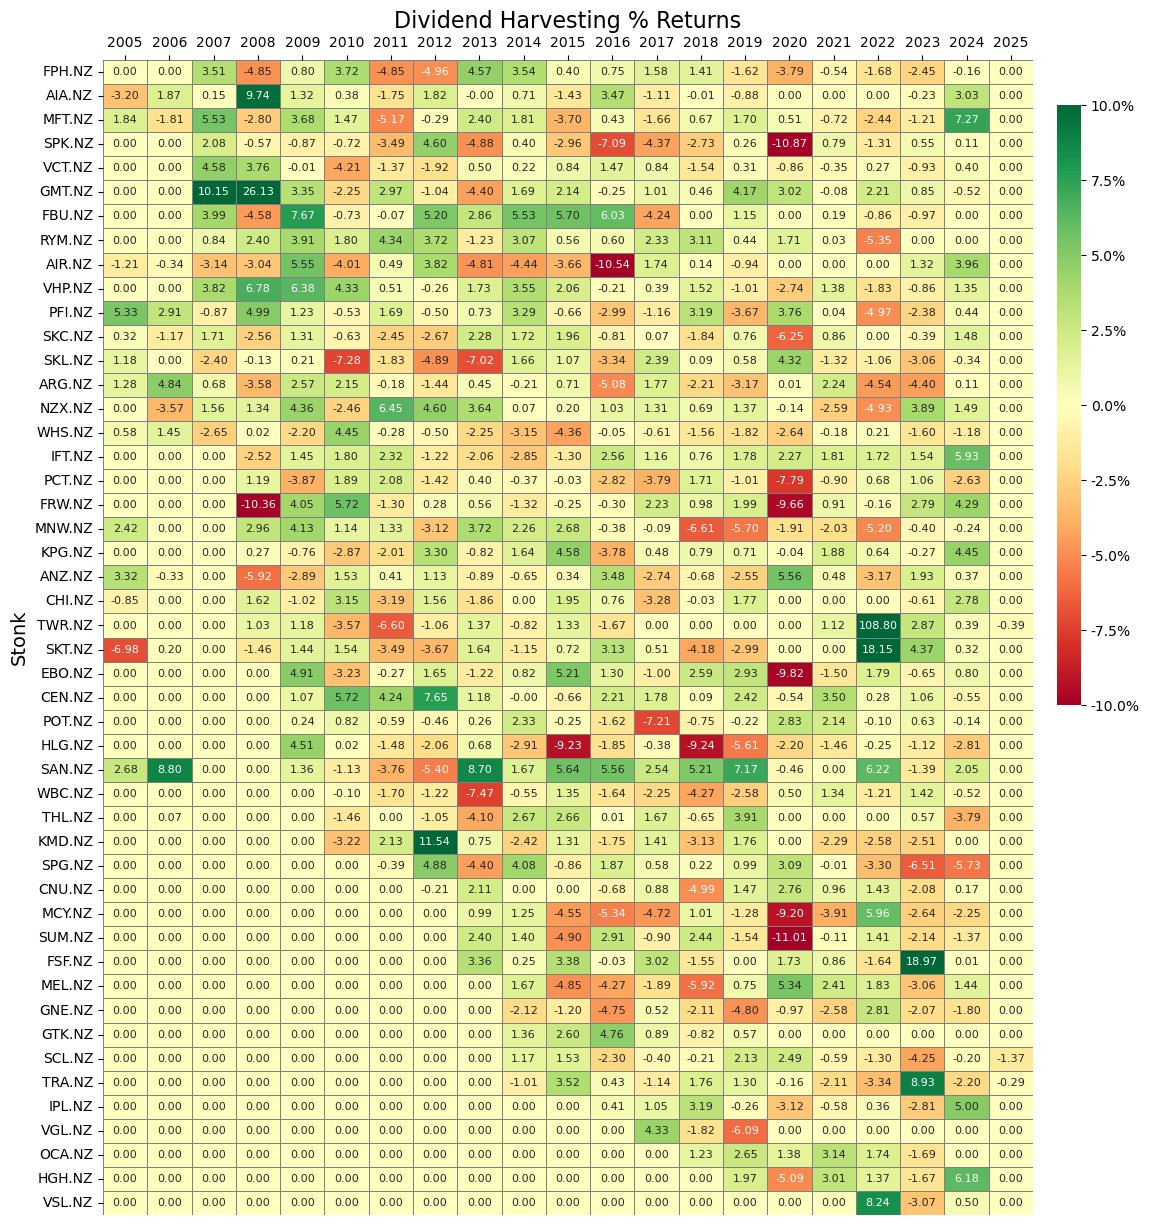

In [328]:
plot_heatmap(df=results_pct, figsize=(12, 15))

In [336]:
results_trades[results_trades['ticker']=='FSF.NZ']

,ex_div_date,buy_date,sell_date,buy_price,sell_price,dividend,investment,shares,sell_proceeds,total_dividend,profit,pct_return,year,ticker
1290,2013-04-09 12:00:00,2013-04-07 12:00:00,2013-04-10 12:00:00,7.234145,7.285,0.16,3000,414.285286,3015.068347,66.285646,81.353993,2.711800,2013,FSF.NZ
1291,2013-10-07 11:00:00,2013-10-06 11:00:00,2013-10-08 11:00:00,7.070000,6.970,0.16,3000,423.903823,2951.609557,67.824612,19.434169,0.647806,2013,FSF.NZ
1292,2014-04-07 12:00:00,2014-04-06 12:00:00,2014-04-08 12:00:00,6.175000,6.165,0.05,3000,485.344133,2989.146563,24.267207,13.413770,0.447126,2014,FSF.NZ
1293,2014-10-06 11:00:00,2014-10-05 11:00:00,2014-10-07 11:00:00,6.390000,6.340,0.05,3000,469.014077,2970.549319,23.450704,-5.999978,-0.199999,2014,FSF.NZ
1294,2015-04-07 12:00:00,2015-04-06 12:00:00,2015-04-08 12:00:00,5.525000,5.445,0.10,3000,542.443430,2950.604438,54.244343,4.848781,0.161626,2015,FSF.NZ
1295,2015-10-05 11:00:00,2015-10-04 11:00:00,2015-10-06 11:00:00,5.260000,5.290,0.15,3000,569.771864,3011.093140,85.465780,96.558919,3.218631,2015,FSF.NZ
1296,2016-04-06 12:00:00,2016-04-05 12:00:00,2016-04-07 12:00:00,5.895000,5.675,0.20,3000,508.396948,2882.152657,101.679390,-16.167954,-0.538932,2016,FSF.NZ
1297,2016-05-26 12:00:00,2016-05-25 12:00:00,2016-05-29 12:00:00,5.695000,5.695,0.10,3000,526.251104,2994.000000,52.625110,46.625110,1.554170,2016,FSF.NZ
1298,2016-08-30 12:00:00,2016-08-29 12:00:00,2016-08-31 12:00:00,5.925000,5.775,0.10,3000,505.822789,2918.126533,50.582279,-31.291188,-1.043040,2016,FSF.NZ
1299,2017-04-03 12:00:00,2017-04-02 12:00:00,2017-04-04 12:00:00,6.095000,6.035,0.20,3000,491.714518,2964.497157,98.342904,62.840061,2.094669,2017,FSF.NZ


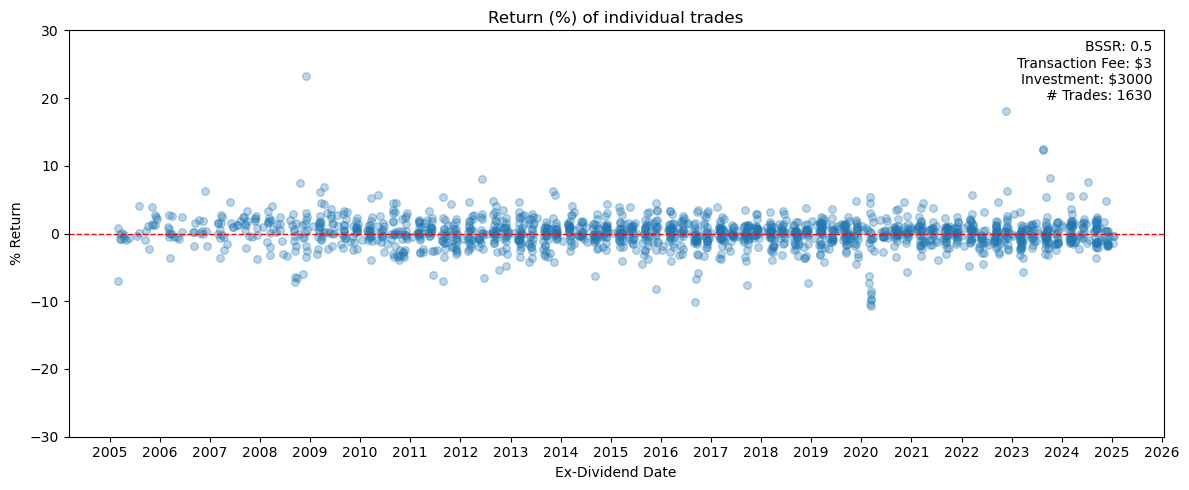

In [329]:
# Ensure the ex_div_date is in datetime format
results_trades['ex_div_date'] = pd.to_datetime(results_trades['ex_div_date'])

# Sort the DataFrame by ex_div_date to have a chronological order
df_trade_summary = results_trades.sort_values(by='ex_div_date')

plot_trade_scatter(data=df_trade_summary, ylim=(-30, 30), 
                   bssr=bssr, trading_fee=trading_fee, investment=investment, 
                   marker_size=30, alpha=0.3)


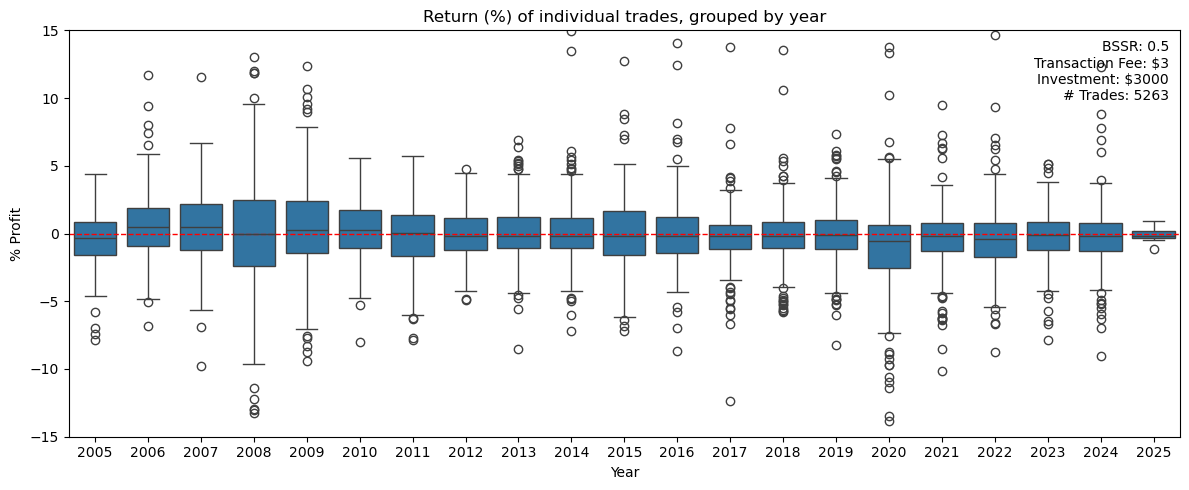

In [330]:
plot_yearly_boxplot(data=results_trades_ax, ylim=(-15, 15), bssr=bssr, trading_fee=trading_fee, investment=investment)

In [360]:
plot_vintage_analysis(results_trades, initial_investment=investment, min_year=2016, max_year=2024)